**GRAPH NEUTRAL NETWORK**

* Hafez ElBoghdadi (ae2405)
* Kadidjatou Mossi (km3906)

## Background

In GNN, graphs are mathematical structures representing a connection between different or similar objects. All graphs are represented by some significance, with nodes or points (vertices), representing an object like cities, persons, atoms. These vertices can carry information or none.
In addition, these graphs also have edges that reprensents the connection between nodes. for example NY is directly connected to Jersey City through a road, however it is connected to London through a flight path but no direct roads, thus we can consider NY and Jersey City are connected by an “edge” (road) but isolated from London (or have a high-cost “edge” using airplanes).
Lastly, they contain graph Metrics, which determine the connectivity strength between nodes.


There are mainly three types of graph neural networks in the literature:
1. Recurrent Graph Neural Network
2. Spatial Convolutional Network
3. Spectral Convolutional Network

In **recurrent GNN**, the signals at each point in time are supported on a graph. They work by aggregating vectors in the neighborhood, passing the result to a dense neural net layer, and finally applying non-linearity.
Graph Convolutional Networks (GCNs) learn features through the inspection of neighboring nodes. They are usually made up of a Graph convolution, a linear layer, and non-linear activation. 
There are two major types of GCNs. The **Spatial Convolutional Networks**, where the features of neighboring nodes are combined into a central node. The features are summed similar to the normal convolution operation. The other one is the **Spectral Convolutional Network**, where the convolution operation is defined in the Fourier domain by computing the eigen decomposition of the graph Laplacian.


An application of GNN include image Processing to conclude the edges between objects in the image to predict the relationship between the objects.
For instance, the medical field uses image processing because it allows for in-depth exploration of internal anatomy. The use of 3D image datasets of the human body, 
(obtained from a Computed Tomography (CT) or Magnetic Resonance Imaging (MRI) scanner) conduct medical interventions (ex:surgery) or for research purposes.




Although Graph Neural Networks are powerful networks, they have some problems.
They are usually have only three layers with graphs with a structure that constantly changes. Moreover, there is not a specific way to generate the graphs, depending on the aplication (where some graphs a fully connected and others, the algorithms detect graph nodes). Finally, Applying GNN are costly.

## Working with the existing code/dataset

**Title:** Zachary's karate club network from the "An Information Flow Model for Conflict and Fission in Small Groups" paper, containing 34 nodes, connected by 156 (undirected and unweighted) edges.
**Authors:** Wayne W. Zachary

The aim of this code is to see a graph with nodes and students (edges) that displays their interactions after class. Each student is a member of one of 4 rival Karate clubs.
To get this to run, these are the changes we made:
* When loading the data, we had to import it as a source code, because the dataset has been removed
* In the original dataset they were actually just 2 but this paper used a modified version of the dataset with the 4 clubs)
* The Dataset is used within a semi-supervised context, we know the true membership of each student, but we will train and calculate the loss function using only 4 (or 2 if using the original dataset)

**Throughout the code, we used other codes & datasets that we modified (which we made sure to highlight, each time). However, the Karate Club dataset is the  main one we used.**

#Validating claim

**explaining claim in your own words what claim in the original work you choose to validate, why you thought this would be interesting or useful, and what you learned from it.
briefly discussing the results.
and explaining any outside sources you used, and how you used them. For example, if your paper is about "Model A" and you chose to build on it by adding a comparison to "Model B", and you used some code you found online for "Model B", you should explain where the code for "Model B" came from and how you used it/adapted it.**
Un-trained ConvGNN can provide comparable Node Embedding for the nodes in Zachary’s 1977 Graph dataset against using the computationally intensive DeepWalk Node Embedding Technique.

#Setup: Install and Import libraries

In [ ]:
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 9.4 MB 6.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 4.6 MB 8.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 3.2 MB 9.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pytorch-geometric.com/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 873 kB 8.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/c

In [ ]:
pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 1.9 MB 8.1 MB/s 
     |████████████████████████████████| 1.8 MB 29.3 MB/s 
     |████████████████████████████████| 24.1 MB 2.4 MB/s 
     |████████████████████████████████| 174 kB 61.9 MB/s 
     |████████████████████████████████| 2.2 MB 47.0 MB/s 
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=102007 sha256=532703c1e0c49d4a67d662c5416f1d3a7933e9dbddeab28be5d28d6398d64de9
  Stored in directory: /root/.cache/pip/wheels/2b/93/72/8e0b3ec687bea23bd34bbb723a82fcb6b074cb756a29441f0c
Successfully built karateclub
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim

In [ ]:
##############
import torch
import torch_geometric
import networkx as nx
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from karateclub import DeepWalk
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import tabulate #For better view of model summary
import matplotlib.pyplot as plt #for GraphX Visualizations
from torch_scatter import scatter_mean
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

This part will print neural network module. It was not part of the compiled function (in torch_geometric) so we had to import it, as a source code, from https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/summary.html#summary

In [ ]:
######## Summary Function
# Not compiled in Windows installation of pytorch-geometric
# https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/summary.html#summary
from collections import defaultdict
from typing import Any, List, Optional, Union

import torch
from torch.jit import ScriptModule
from torch.nn import Module
from torch_sparse import SparseTensor

from torch_geometric.nn.conv import MessagePassing

def summary(
    model: torch.nn.Module,
    *args,
    max_depth: int = 3,
    leaf_module: Optional[Union[Module, List[Module]]] = 'MessagePassing',
    **kwargs,
) -> str:
    r"""Summarizes a given :class:`torch.nn.Module`.
    The summarized information includes (1) layer names, (2) input and output
    shapes, and (3) the number of parameters.

    .. code-block:: python

        import torch
        from torch_geometric.nn import GCN, summary

        model = GCN(128, 64, num_layers=2, out_channels=32)
        x = torch.randn(100, 128)
        edge_index = torch.randint(100, size=(2, 20))

        print(summary(model, x, edge_index))

    .. code-block::

        +---------------------+---------------------+--------------+--------+
        | Layer               | Input Shape         | Output Shape | #Param |
        |---------------------+---------------------+--------------+--------|
        | GCN                 | [100, 128], [2, 20] | [100, 32]    | 10,336 |
        | ├─(act)ReLU         | [100, 64]           | [100, 64]    | --     |
        | ├─(convs)ModuleList | --                  | --           | 10,336 |
        | │    └─(0)GCNConv   | [100, 128], [2, 20] | [100, 64]    | 8,256  |
        | │    └─(1)GCNConv   | [100, 64], [2, 20]  | [100, 32]    | 2,080  |
        +---------------------+---------------------+--------------+--------+

    Args:
        model (torch.nn.Module): The model to summarize.
        *args: The arguments of the :obj:`model`.
        max_depth (int, optional): The depth of nested layers to display.
            Any layers deeper than this depth will not be displayed in the
            summary. (default: :obj:`3`)
        leaf_module (torch.nn.Module or [torch.nn.Module], optional): The
            modules to be treated as leaf modules, whose submodules are
            excluded from the summary.
            (default: :class:`~torch_geometric.nn.conv.MessagePassing`)
        **kwargs: Additional arguments of the :obj:`model`.
    """
    # NOTE This is just for the doc-string to render nicely:
    if leaf_module == 'MessagePassing':
        leaf_module = MessagePassing

    def register_hook(info):
        def hook(module, inputs, output):
            info['input_shape'].append(get_shape(inputs))
            info['output_shape'].append(get_shape(output))

        return hook

    hooks = {}
    depth = 0
    stack = [(model.__class__.__name__, model, depth)]

    info_list = []
    input_shape = defaultdict(list)
    output_shape = defaultdict(list)
    while stack:
        name, module, depth = stack.pop()
        module_id = id(module)

        if module_id in hooks:  # Avoid duplicated hooks.
            hooks[module_id].remove()

        info = {}
        info['name'] = name
        info['input_shape'] = input_shape[module_id]
        info['output_shape'] = output_shape[module_id]
        info['depth'] = depth
        num_params = sum(p.numel() for p in module.parameters())
        info['#param'] = f'{num_params:,}' if num_params > 0 else '--'
        info_list.append(info)

        if not isinstance(module, ScriptModule):
            hooks[module_id] = module.register_forward_hook(
                register_hook(info))

        if depth >= max_depth:
            continue

        if (leaf_module is not None and isinstance(module, leaf_module)):
            continue

        module_items = reversed(module._modules.items())
        stack += [(f"({name}){mod.__class__.__name__}", mod, depth + 1)
                  for name, mod in module_items if mod is not None]

    training = model.training
    model.eval()

    with torch.no_grad():
        model(*args, **kwargs)

    model.train(training)

    for h in hooks.values():  # Remove hooks.
        h.remove()

    info_list = postprocess(info_list)
    return make_table(info_list, max_depth=max_depth)



def get_shape(inputs: Any) -> str:
    if not isinstance(inputs, (tuple, list)):
        inputs = (inputs, )

    out = []
    for x in inputs:
        if isinstance(x, SparseTensor):
            out.append(str(list(x.sizes())))
        elif hasattr(x, 'size'):
            out.append(str(list(x.size())))
    return ', '.join(out)


def postprocess(info_list: List[dict]) -> List[dict]:
    for idx, info in enumerate(info_list):
        depth = info['depth']
        if idx > 0:  # root module (0) is exclued
            if depth == 1:
                prefix = '├─'
            else:
                prefix = f"{'│    '*(depth-1)}└─"
            info['name'] = prefix + info['name']

        if info['input_shape']:
            info['input_shape'] = info['input_shape'].pop(0)
            info['output_shape'] = info['output_shape'].pop(0)
        else:
            info['input_shape'] = '--'
            info['output_shape'] = '--'
    return info_list


def make_table(info_list: List[dict], max_depth: int) -> str:
    from tabulate import tabulate
    content = [['Layer', 'Input Shape', 'Output Shape', '#Param']]
    for info in info_list:
        content.append([
            info['name'],
            info['input_shape'],
            info['output_shape'],
            info['#param'],
        ])
    return tabulate(content, headers='firstrow', tablefmt='psql')


#2-Layer GCN

There is two ways to define Graph neural network. 
Below is the common way to generate GCN

In [ ]:
class GCN_1(torch.nn.Module):
    def __init__(self): # The Class Object will not have any arguments to be called with
        
        super().__init__()
        self.conv1 = torch_geometric.nn.GCNConv(dataset1.num_node_features, 16) # X node attributes (5 * 34 attrib), H=16
        #Input to Layer 0 : 
        #(Pi/p =i/p features channels) x (H=16) which are the dims of W in L0
        # conv1 will call the built-in GCNConv function with i/p the size of W
        # This is like initalizing a weight matrix and prepares for sparse matrix multip
        # of this W with the input A and X matrices
        #print ('self.conv1', self.conv1)
        
        self.conv2 = torch_geometric.nn.GCNConv(16, dataset1.num_classes) # F = 4 , each node can be a member of 1 of 4 factions
        #Input to Layer 1 : 
        #(H= Hidden channels) x (Po/p O/P Channels) which are the dims of W in L1 (o/p Layer)
        #print ('self.conv2', self.conv2)

    def forward(self, data): 
        # I/P a pytorch graph Object , generated from Data() function based on Nodes attribs\
        # and Nodes COO Edges, and optionally Edges Attributes and Weights
        
        # Extract the X Attributes Matrix (N x Pi/p or D in Kpif paper)
        # Node feature matrix of shape [num_nodes, in_channels]
        
        # And Edges in COO Form ; Graph connectivity matrix of shape [2 x num_edges]
        
        h0, edge_index = data.x, data.edge_index # x=H(0) 34*34 , A=edge_index , 
        #print ('h0',h0.shape,h0)
         
        #Layer 0 Equation
        h1_ = self.conv1(h0, edge_index) # H_(1)= A~ * H(0) * W(0) from the class def.
        #supplies i/p X and A  #to the GConv Layer
        #print ('h1_',h1_.shape,h1_)
        
        
        #Layer 0 Activation - Relu
        h1 = torch.nn.functional.relu(h1_)
        #print ('h1',h1.shape,h1)
        
        #h1 = F.dropout(h1, training=self.training)
        
        #Layer 1 Equation
        h2_ = self.conv2(h1, edge_index) # H(2)= A~ * H(1) * W(1) from the class def.
        #print ('h2_',h2_.shape,h2_)
        
        #Layer 1 O/P - Softmax with dim = 1 
        #https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html#torch.nn.LogSoftmax
        h2=torch.nn.functional.log_softmax(h2_, dim=1) #dim=1 means softmax on row. i.e. [1,2,3] o/p= [exp1, exp2, exp3]/[sum (expi)]
        #mathematically equivalent to log(softmax(x)), doing these two operations separately is slower and numerically unstable. This function uses an alternative formulation to compute the output and gradient correctly.
        # dim=1 means apply the softmax row-wise, i.e. softmax(each individual node outputs)

        #print ('h2',h2.shape,h2)
        
        return h2,[h0,h1_,h1,h2_,h2]


#Applying the 2-layer GCN on Enzymes Dataset

Download Cora Files from Palnetoid Datasets, and use it as a dataset object

In [ ]:
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)


Here, we create the dataset object attributes

In [ ]:
## number of unique o/p labels/attributes in all nodes
## here each node can have one of possible 7 , i.e. y is element of {0,1,2,3,4,5,6} 
print (f"number of unique o/p labels/attributes in all nodes {dataset.num_classes}") 

# no. of nodes features per node or length of x vector Per Node

print (f"no. of nodes features per node or length of x vector Per Node : {dataset.num_node_features}") 


# no. of graphs in the dataset object
print (f"no. of graphs in the dataset object : {len(dataset)}") 


number of unique o/p labels/attributes in all nodes 6
no. of nodes features per node or length of x vector Per Node : 21
no. of graphs in the dataset object : 600


Now, load Datasets per Batch

In [ ]:



for i, data in enumerate(loader):
    print (f" DataBatch Object {i}, No. of Graphs in Batch: {data.num_graphs}, Node Attributes Matrix Dimensions {scatter_mean(data.x, data.batch, dim=0).size()} ") #Batch of 32 Graphs
    # scatter_mean of  their nodes mean per column (32 Graphs x 21 node attribs columns Matrix)


 DataBatch Object 0, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 1, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 2, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 3, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 4, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 5, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 6, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 7, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 8, No. of Graphs in Batch: 32, Node Attributes Matrix Dimensions torch.Size([32, 21]) 
 DataBatch Object 9, No. of Graphs in Batch: 32, Node A

* As we can see (from the output cell above), the dataset has only one file, but it contains all of these different graphs.
* Now we will apply 'cuda' on the device using the dataset.

In [ ]:
#Download Cora Files from Palnetoid Datasets, and use it as a dataset object
dataset1 = torch_geometric.datasets.Planetoid(root='/tmp/Cora', name='Cora')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # NVIDIA CUDA else CPU
model1 = GCN_1().to(device) # Move the model object to Device-Mode Execution
graph1 = dataset1[0].to(device) # Move the dataset object to Device-Mode Storage as Graph obj

Here, we will use Planetoid as a dataset object, move the dataset object to Device-Mode Storage as Graph obj and only use one graph from the file.

In [ ]:
graph1 = dataset1[0].to(device) 
graph1 

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

The output cell, above shows us that we have:
* 2708 nodes, each with 1433 attributes, 10556/2 unidirectional edges
* 2708 nodes have a mask list for tr,val,tst
* Masks = [True, False, ....] indicating which node can be used in what
* For example, if train_mask= [True,False,False] then you can use the first node only in training

Each Node have a single discrete label value y between available 7 labels, each representing a paper category

In [ ]:
graph1.y, graph1.y.unique()

(tensor([3, 4, 4,  ..., 3, 3, 3]), tensor([0, 1, 2, 3, 4, 5, 6]))

This dataset has already masks identifying which nodes that can be used for training/validation/testing ;

In [ ]:
print (f"We have {graph1.train_mask.sum()} Tr nodes out of {len(graph1.train_mask)} total nodes ")
# sum (True) = 140 Training Nodes, out of 2708

We have 140 Tr nodes out of 2708 total nodes 


Now we can find the training Label Rate (to see how much percentage of the nodes we will use on the training) by doing the folowing:

In [ ]:
print (f"The training label is {graph1.train_mask.sum()/graph1.num_nodes }")

The training label is 0.05169866979122162


In order to visualize the graph we need to apply the 'torch_geometric.utils.to_networkx' coversion to convert the graph object from Pytorch Geometric to NetworkX object.

In [ ]:
graph1.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

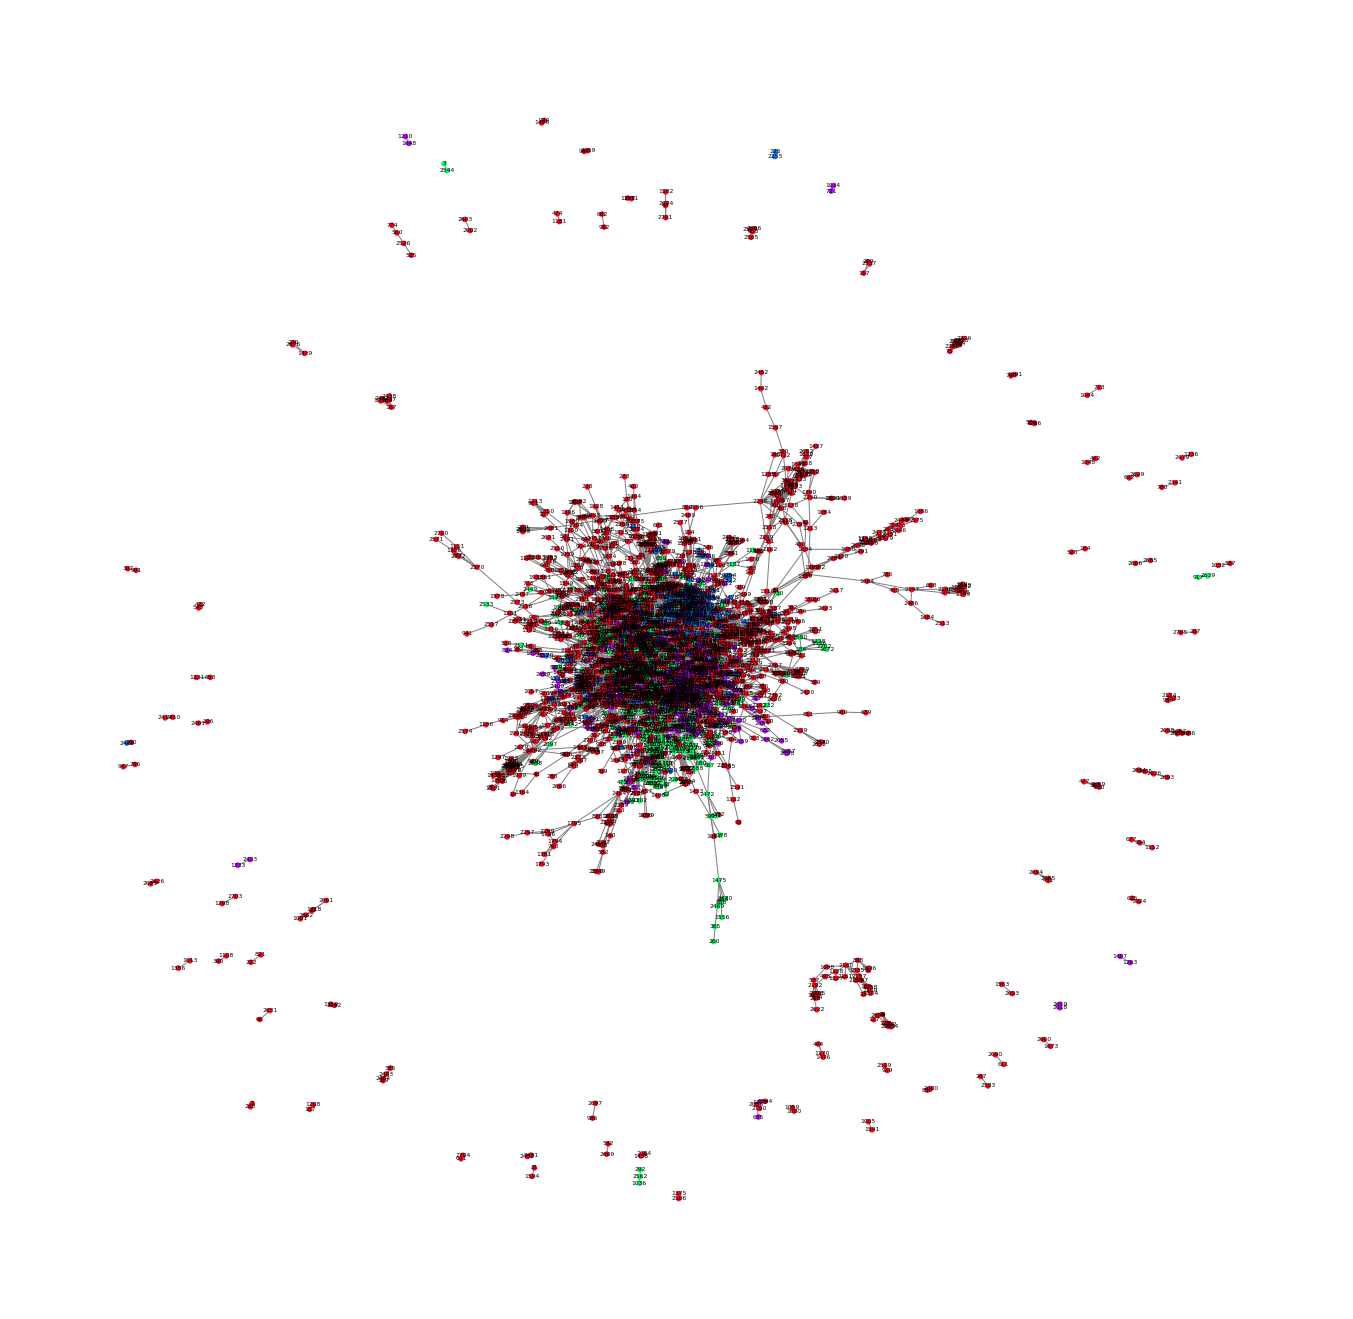

In [ ]:
G = torch_geometric.utils.to_networkx(graph1, to_undirected=True)
plt.figure(figsize=(24,24))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True, #Indicating Node Labels (ID)
                node_size=20,
                node_color=graph1.y, #Indicationg Nodes Classes from the y Vector
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=1,
                edge_color="grey",
                font_size=6
                )
plt.show()


We also add an optimizer to configure it for the neural network

In [ ]:
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01, weight_decay=5e-4)

Now, we're going to **train the model**.
* model.train() tells your model that you are training the model. This helps inform layers such as Dropout and BatchNorm, which are designed to behave differently during training and evaluation.

In [ ]:
GCN_1.train()

GCN_1(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)

**Modified**

from https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html
The difference is , in this case, we are only training the train nodes instead of the whole graph, unlike the paper.

In [ ]:
for epoch in range(200):
    
    optimizer.zero_grad() 
    # for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation 
    
    h2,h_all = model1(graph1) #Input graph1 to the model1 , and the value will be in h2,h_all 
    #print ("h_all",h_all)
    #print ("h2=z", h2.shape, h2)
    
    loss = torch.nn.functional.nll_loss(input=h2[graph1.train_mask], target=graph1.y[graph1.train_mask])
    #Generate Loss fuction using negative log likehood, between the Tr labeled nodes
    
    loss.backward()
   #Computes the gradient of current tensor w.r.t. graph leaves
    
    optimizer.step()
    # Updates Weights

Now , we'll do a NLL Loss Example

After training, it is time to evaluate and test the model:

> Indented block


* Generate the Max value per row, and generate a column out of it, this is the prediction
* Check if the prediction is same to the evaluation only for the test_mask data
* graph1.y[graph1.test_mask] is the vector of all nodes labels with mask, where graph1.y are the nodes labels vector
* Get accuracy and print it
* The cell below is for graph1.val_mask and the one after is graph1.test_mask

In [ ]:
model1.eval()
pred = h2.argmax(dim=1) 
correct = (pred[graph1.val_mask] == graph1.y[graph1.val_mask]).sum() 

acc = int(correct) / int(graph1.test_mask.sum()) 
print(f'Evaluation Accuracy: {acc:.4f}')


Accuracy: 0.3870


In [ ]:
pred = h2.argmax(dim=1) 
correct = (pred[graph1.test_mask] == graph1.y[graph1.test_mask]).sum() 

acc = int(correct) / int(graph1.test_mask.sum()) 
print(f'Test Accuracy: {acc:.4f}')


Test Accuracy: 0.8060


This is another quick example to display the Model Summary Function: the input is a random signal with dim (400,1128) and the model is constructed this time using Pytorch Sequential Modules

In [ ]:
x2 = torch.randn(400, 128) #
edge_index2 = torch.randint(100, size=(2, 20))

model2 = torch_geometric.nn.GCN ( in_channels=128 
                                , hidden_channels=64 
                                , num_layers=1 
                                , out_channels=32)  


print(summary(model2, x2, edge_index2)) # Model Summary

+---------------------+---------------------+----------------+----------+
| Layer               | Input Shape         | Output Shape   | #Param   |
|---------------------+---------------------+----------------+----------|
| GCN                 | [400, 128], [2, 20] | [400, 32]      | 4,128    |
| ├─(act)ReLU         | --                  | --             | --       |
| ├─(convs)ModuleList | --                  | --             | 4,128    |
| │    └─(0)GCNConv   | [400, 128], [2, 20] | [400, 32]      | 4,128    |
+---------------------+---------------------+----------------+----------+


#Generating GCN from the Karate Club Dataset

This is the Karate Dataset. Like the previous section (generating FCN from Cora dataset), we're going to load the data. However we are importing it as a source code, because the dataset has been removed.

* https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/datasets/karate.html
* https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub
* Zachary's karate club network from the "An Information Flow Model for Conflict and Fission in Small Groups" paper, containing 34 nodes, connected by 156 (undirected and unweighted) edges.
* https://www.jstor.org/stable/3629752 : An Information Flow Model for Conflict and Fission in Small Groups - Wayne W. Zachary

In [ ]:
from typing import Callable, Optional
import torch
from torch_geometric.data import Data, InMemoryDataset

class KarateClub(InMemoryDataset):
    r"""Zachary's karate club network from the `"An Information Flow Model for
    Conflict and Fission in Small Groups"
    <http://www1.ind.ku.dk/complexLearning/zachary1977.pdf>`_ paper, containing
    34 nodes, connected by 156 (undirected and unweighted) edges.
    Every node is labeled by one of four classes obtained via modularity-based
    clustering, following the `"Semi-supervised Classification with Graph
    Convolutional Networks" <https://arxiv.org/abs/1609.02907>`_ paper.
    Training is based on a single labeled example per class, *i.e.* a total
    number of 4 labeled nodes.

    Args:
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.Data` object and returns a transformed
            version. The data object will be transformed before every access.
            (default: :obj:`None`)

    Stats:
        .. list-table::
            :widths: 10 10 10 10
            :header-rows: 1

            * - #nodes
              - #edges
              - #features
              - #classes
            * - 34
              - 156
              - 34
              - 4
    """
    def __init__(self, transform: Optional[Callable] = None):
        super().__init__('.', transform)

        row = [
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4,
            5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10,
            10, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
            18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 23, 23, 23, 24,
            24, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29,
            29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
            33, 33, 33, 33, 33, 33
        ]
        col = [
            1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 0, 2, 3, 7,
            13, 17, 19, 21, 30, 0, 1, 3, 7, 8, 9, 13, 27, 28, 32, 0, 1, 2, 7,
            12, 13, 0, 6, 10, 0, 6, 10, 16, 0, 4, 5, 16, 0, 1, 2, 3, 0, 2, 30,
            32, 33, 2, 33, 0, 4, 5, 0, 0, 3, 0, 1, 2, 3, 33, 32, 33, 32, 33, 5,
            6, 0, 1, 32, 33, 0, 1, 33, 32, 33, 0, 1, 32, 33, 25, 27, 29, 32,
            33, 25, 27, 31, 23, 24, 31, 29, 33, 2, 23, 24, 33, 2, 31, 33, 23,
            26, 32, 33, 1, 8, 32, 33, 0, 24, 25, 28, 32, 33, 2, 8, 14, 15, 18,
            20, 22, 23, 29, 30, 31, 33, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23,
            26, 27, 28, 29, 30, 31, 32
        ]
        edge_index = torch.tensor([row, col])

        y = torch.tensor([  # Create communities.
            1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1,
            0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0
        ])

        x = torch.eye(y.size(0), dtype=torch.float)

        # Select a single training node for each community
        # (we just use the first one).
        train_mask = torch.zeros(y.size(0), dtype=torch.bool)
        for i in range(int(y.max()) + 1):
            train_mask[(y == i).nonzero(as_tuple=False)[0]] = True

        data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask)

        self.data, self.slices = self.collate([data])

In [ ]:
dataset = KarateClub()

Now, we are going to get the Dataset Properties

In [ ]:
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}') 
print(f'Number of classes: {dataset.num_classes}') #No. of possible labels for each node, True y for each node
print(f'Number of edge_features: {dataset.num_edge_features}') # Dimensions of per-edge attributes in the graph
print(f'Number of Node features : {dataset.num_features}') #No. of features per each node, rows of Matrix X

KarateClub()
------------
Number of graphs: 1
Number of classes: 4
Number of edge_features: 0
Number of Node features : 34


##### Here is a quick description of the Karate Club Dataset:
A Single Graph, with 34 nodes each representing a karate student, each student is a friend of another student through the edges of the graph, there are no edges features to indicate a metric for the strength of this friendship or if it is one-sided or not, so the graph edges are bidirectional.
Among the nodes are 2 Karate Club masters who had a feud with each other, and each student must take a side, the side the student takes is affected by his friendship relationships with other students.
The original dataset dates back to 1937, it had only 2 labeled nodes and the rest of them are unlabeled, however a modularity algorithm was applied on the paper identifying 4 main clusters or 4 distinct group of nodes, expanding the original dataset from 2 labeled nodes to 4 groups of node.
The main problem is to train the GNN with only 4 nodes ; 1 labeled node per each group, and the it is up to the GNN algorithm to provide a representation for each node in an n-dimensional space (typically 2 or 3 for interpretability) such that each group of nodes are almost linearly separable from the other. 

In [ ]:
graphs=dataset[0]
print (graphs)
print(f'Number of features: {graphs.num_features}') # No. of node attributes per node
print(f'Number of Edge Features: {graphs.num_edge_features}') # dim of edge attributes
print(f'Number of Edge Attribs: {graphs.edge_attr}') #Vakues of edge attributes


Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of features: 34
Number of Edge Features: 0
Number of Edge Attribs: None


In [ ]:


#print(f'Number of Edge Features: {graphs.edge_stores}')
print(f'Number of Edge Weight: {graphs.edge_weight}')
#print(f'Number of Edge Features: {graphs.num_edge_features}')
print(f'X Matrix Size: {graphs.size()}') ## Node Attributes Matrix X=H(-1) Size (34 Nodes, 34 attributes) 
#print(f'Number of Edge Features: {graphs.has_isolated_nodes}')
print(f'Number of Isolated Nodes: {graphs.has_isolated_nodes()}')
print(f'Directed Graph or Not: {graphs.is_directed()}')
print(f'Dimension of Labeled Nodes Matrix Y: {graphs.y.size()}')


Number of Edge Weight: None
X Matrix Size: (34, 34)
Number of Isolated Nodes: False
Directed Graph or Not: False
Dimension of Labeled Nodes Matrix Y: torch.Size([34])


The features matrix is actually the identity matrix, so it has no distinct information other than a node ID, so for the classification we will need to rely on the connections between users, in other words the connections represented by the Adjacency Matrix that is represented by the COO format for efficient calculations.

In [ ]:
X=pd.DataFrame(graphs.x.numpy().astype(int))
X

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


This is the labels vectors per node, each node class is represented by a single value within {0,1,2,3} , the classess are mutually exclusive i.e. Each Node can be only belong to one class, so there is no need for one-hot encoding here.

In [ ]:
y=pd.DataFrame(graphs.y.numpy().astype(int))
y.T

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,1,1,1,3,3,3,1,0,1,...,2,2,0,0,2,0,0,2,0,0


* COO Representation of the Edges, more efficient than Adjacency
* First row is the source node ID, destination is the destination node
* The COO format dimension is (2, 2 * number of unique edges) 


In [ ]:
A_coo=pd.DataFrame(graphs.edge_index.numpy().astype(int)) #COO format of A
A_coo

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,1,2,3,4,5,6,7,8,10,11,...,20,22,23,26,27,28,29,30,31,32


The edges are represented by the Coordinate List format to indicate the edges locations in an efficient way to represent a sparse matrix (a matrix with most of its elements are 0s and 1s).
We can convert the COO format to an adjacency matrix using Geometric Torch Utilities Libraries
https://mlabonne.github.io/blog/intrognn/

In [ ]:
A = pd.DataFrame(torch_geometric.utils.to_dense_adj(graphs.edge_index)[0].numpy().astype(int)) # Actua Adjacency Matrix

The True Labels for nodes is graphs.y

In [ ]:
y=pd.DataFrame(graphs.y)
y.T

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,1,1,1,3,3,3,1,0,1,...,2,2,0,0,2,0,0,2,0,0



* Training Nodes : For the training nodes, we have only 4 training node ; nodes 0,3,8,24
* Validation Nodes : The dataset does not include any validation nodes since there is no validation mask.
* Test Nodes : The remaining 34-4 = 30 nodes are the unlabeled test nodes 

In [ ]:
X_tr=pd.DataFrame(graphs.x[graphs.train_mask].numpy().astype(int))
X_tr

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_tr=pd.DataFrame(graphs.y[graphs.train_mask])
y_tr

,0
0,1
1,3
2,0
3,2


Now the tensor graph is converted to netwrokX object for easier plotting

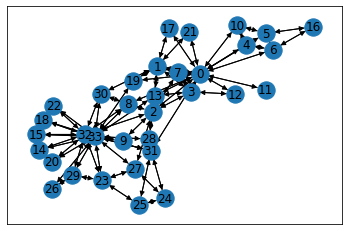

In [ ]:
graphs_x = torch_geometric.utils.to_networkx(graphs)
nx.draw_networkx(graphs_x)

To plot the graph with labels, we referred to https://mlabonne.github.io/blog/intrognn/





This represent a better layout of the graph. 



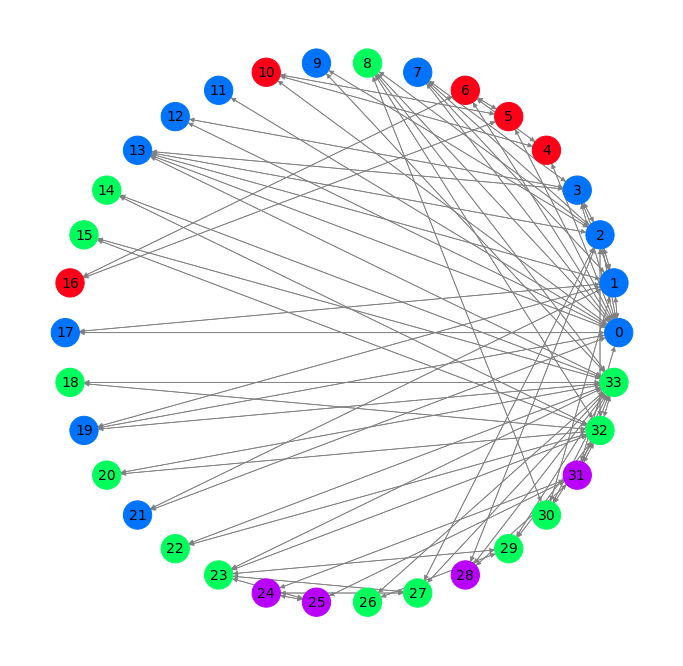

In [ ]:
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(graphs_x,
                pos=nx.circular_layout(graphs_x),
                with_labels=True, #Indicating Node Labels (ID)
                node_size=800,
                node_color=graphs.y, #Indicationg Nodes Classes from the y Vector
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

## Alternatives for the layout are ; 
# draw_spring, draw_spectral, draw_circular, draw_shell, draw_planar, draw_random

Each color represents a different club. As we can see, the 0 and the 33 has the most nodes connected to them. Another observation we can make is that the color red and purple has the fewest clubs.

Here, the code show a better layout of the clubs, but separated by color.

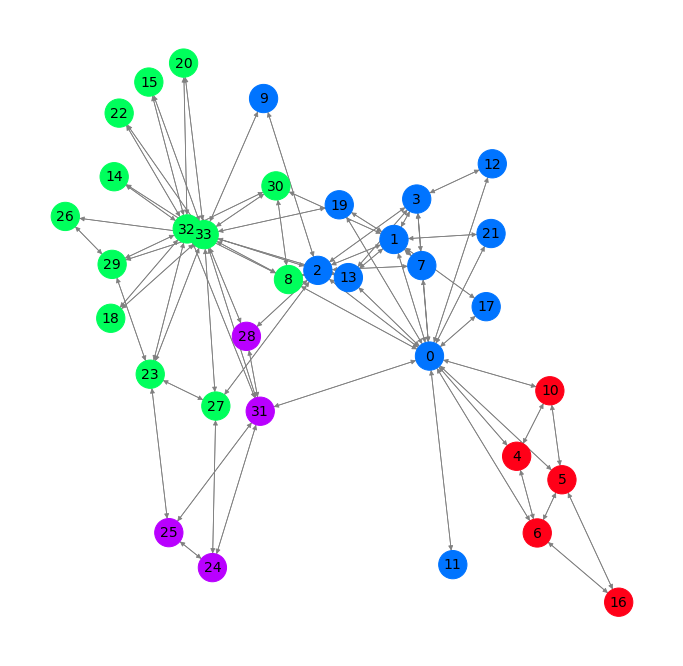

In [ ]:
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(graphs_x,
                pos=nx.spring_layout(graphs_x),
                with_labels=True, #Indicating Node Labels (ID)
                node_size=800,
                node_color=graphs.y, #Indicationg Nodes Classes from the y Vector
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

## Alternatives for the layout are ; 
# draw_spring, draw_spectral, draw_circular, draw_shell, draw_planar, draw_random

The GCN implemened is based on the paper "Semi-Supervised Classification with Graph Convolutional Networks - Kipf and Welling, ICLR 2017"

* 1 Layer GCN with Dim=3 (In Paper ; H=3 Feature Maps) --> ReLu Activation --> Linear Classifier with possible 4 classes.
* Number of trainable parameters are (34 weights + 1 bias) * (Hidden Dim=3) = 105 
* Linear Classifer : y = xW + B, x has dim (34,3) and y has possible 4 classes, * so W has dim (3,4), y will be a probability/score one-hot encoded variable 1x4 per node.
* so the number of trainable parameters are (3*4 weights + 4 bias) = 12+4 = 16

* Loss function: Cross Entropy Loss since there are 4 possible classes per node and one-hot encoding is not used.
* Learning Rate: alpha=0.02 initially.

Now were are going to start to train the graph

For H : Feature Map Size, H was selected to be H=4
For F : O/P Dimension, There are 3 cases here ;
1. When Used for the Semi-supervised Training against the 4-labeled Karate Club Dataset, F=4 To match the number of possible O/p labels for the Softmax function. 
2. When Used for the Semi-supervised Training against the 2-labeled Karate Club Dataset, F=2 To match the number of possible O/p labels for the Softmax function.  
3. When Compared against DeepWalk Node Embedding for the Semi-supervised Training against the 4-labeled Karate Club Dataset, F can actually be selected to be F=2 since we are going to ignore the training of the NN so no Loss Function will be used..  

During our multiple attempts in testing with the different NN parameters, we noticed the following ;


1.   LeakyRelu and Tanh had better performance than ReLu, due to the vanishing gradient
2.   Adding Multiple Layer beyond 3 layers did not provide an improvement on the performance
3.   DropOut Layers did not imporve the performance.



Case 1 : Semi-supervised Training against the 4-labeled Karate Club Dataset

training rate= 0.11764705926179886
+-----------------------+--------------------+----------------+----------+
| Layer                 | Input Shape        | Output Shape   | #Param   |
|-----------------------+--------------------+----------------+----------|
| Sequential_757a3b     | [34, 34], [2, 156] | [34, 4]        | 180      |
| ├─(module_0)GCNConv   | [34, 34], [2, 156] | [34, 4]        | 140      |
| ├─(module_1)LeakyReLU | [34, 4]            | [34, 4]        | --       |
| ├─(module_2)GCNConv   | [34, 4], [2, 156]  | [34, 4]        | 20       |
| ├─(module_3)LeakyReLU | [34, 4]            | [34, 4]        | --       |
| ├─(module_4)GCNConv   | [34, 4], [2, 156]  | [34, 4]        | 20       |
| ├─(module_5)LeakyReLU | [34, 4]            | [34, 4]        | --       |
| ├─(module_6)Softmax   | [34, 4]            | [34, 4]        | --       |
+-----------------------+--------------------+----------------+----------+
Sequential(
  (0): GCNConv(34, 4)
  (1): LeakyReLU(negative_slope

Text(0.5, 1.0, '3 Layer ConvGCN Semi-Supervised Training Accuracy')

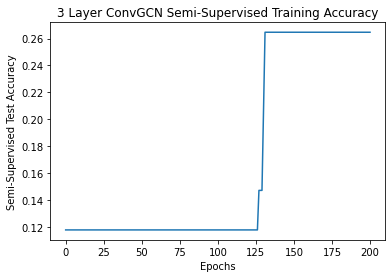

In [ ]:
nn_mask=graphs.train_mask

H=4 # This is the Hiddent Feature Map Size, H was selected to be H=4 in the paper.
F=len(graphs.y[nn_mask].unique()) # The o/p signal dimension to match the number of possible classes, Here F=4
nn_mask=graphs.train_mask

# Training Rate is the ratio between Training nodes used in NN and the total number of nodes in the graph
tr_rate=nn_mask.sum()/graphs.y.size()[0] 
print (f"training rate= {tr_rate}")


model1_gcn= torch_geometric.nn.Sequential(\
                                       'X, A_coo'
                                       , [
                                        (torch_geometric.nn.GCNConv(X.shape[1], H), 'X, A_coo -> H1_')
                                        ,(torch.nn.LeakyReLU(inplace=True), 'H1_ -> H1')
                                        ,(torch_geometric.nn.GCNConv(H, H), 'H1, A_coo -> H2_')
                                        ,(torch.nn.LeakyReLU(inplace=True), 'H2_ -> H2')
                                        ,(torch_geometric.nn.GCNConv(H,F), 'H2, A_coo -> H3_')
                                        ,(torch.nn.LeakyReLU(inplace=True), 'H3_ -> H3')
                                        ,(torch.nn.Softmax(dim=1),'H3 -> Z')
                                        ]
                                      )

print(summary(model1_gcn, graphs.x, graphs.edge_index))
print(model1_gcn)

alpha=0.002

# https://stackoverflow.com/questions/52946920/bool-value-of-tensor-with-more-than-one-value-is-ambiguous-in-pytorch
# Loss function must be instantiate before being used
loss_function=torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model1_gcn.parameters(), lr=alpha)


accuracy_list=[]
Z_list=[]
L_list=[]
y_predicted_list=[]
y_error_mask_list=[]


for epochs in range (200+1):
    #https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
    # for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behaviour is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call
    # when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters, and the newly-computed gradient.
    #optimizer.zero_grad() clears x.grad for every parameter x in the optimizer. It’s important to call this before loss.backward(), otherwise you’ll accumulate the gradients from multiple passes.
    optimizer.zero_grad()     
    
    #Output is a 1x4 score vector one-hot encoded, the predicted class will be the one with max value
    Z=model1_gcn(graphs.x,graphs.edge_index)
    Z_list.append(Z)
    
    L=loss_function( input=Z[nn_mask], target=graphs.y[nn_mask])
    L_list.append(L)
    
    y_predicted=Z.argmax(dim=1)
    y_predicted_list.append(y_predicted)
    y_error_mask=(y_predicted==graphs.y)
    y_error_mask_list.append(y_error_mask)
    

    
    
    accuracy=y_error_mask.sum()/graphs.y.size()[0]
    accuracy_list.append(accuracy)
    
    
    # Compute gradients
    #https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html
    #https://discuss.pytorch.org/t/what-does-the-backward-function-do/9944
    #The graph is differentiated using the chain rule. If the tensor is non-scalar (i.e. its data has more than one element) and requires gradient, the function additionally requires specifying gradient. It should be a tensor of matching type and location, that contains the gradient of the differentiated function w.r.t. self.
    #Computes the gradient of current tensor w.r.t. graph leaves
    #This function accumulates gradients in the leaves - you might need to zero .grad attributes or set them to None before calling it.
    #https://discuss.pytorch.org/t/what-does-the-backward-function-do/9944
    #loss.backward() computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x. In pseudo-code:
    #x.grad += dloss/dx
    #x += -lr * x.grad

    L.backward()     

    # Tune parameters
    # Updates Weights
    #optimizer.step updates the value of x using the gradient x.grad. For example, the SGD optimizer performs:
    optimizer.step()
    
    # Print metrics every 10 epochs
    if epoch % 20 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%| {accuracy_list[-1]}, {int(accuracy_list[-1]*graphs.x.size()[0])} correct, {int(graphs.x.size()[0]-int(accuracy_list[-1]*graphs.x.size()[0]))} wrong')

plt.plot(accuracy_list)
plt.xlabel("Epochs")
plt.ylabel("Semi-Supervised Test Accuracy")
plt.title("3 Layer ConvGCN Semi-Supervised Training Accuracy")


This is similar but using the fucntion and class definition. 

+----------------+--------------------+------------------+----------+
| Layer          | Input Shape        | Output Shape     |   #Param |
|----------------+--------------------+------------------+----------|
| GCN            | [34, 34], [2, 156] | [34, 3], [34, 4] |      121 |
| ├─(gcn)GCNConv | [34, 34], [2, 156] | [34, 3]          |      105 |
| ├─(out)Linear  | [34, 3]            | [34, 4]          |       16 |
+----------------+--------------------+------------------+----------+
GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(3, 4, bias=True)
)
Epoch   0 | Loss: 1.43 | Acc: 50.00%| 0.5, 17 correct, 17 wrong
Epoch  10 | Loss: 1.28 | Acc: 38.24%| 0.38235294818878174, 13 correct, 21 wrong
Epoch  20 | Loss: 1.09 | Acc: 50.00%| 0.5, 17 correct, 17 wrong
Epoch  30 | Loss: 0.85 | Acc: 52.94%| 0.529411792755127, 18 correct, 16 wrong
Epoch  40 | Loss: 0.61 | Acc: 61.76%| 0.6176470518112183, 21 correct, 13 wrong
Epoch  50 | Loss: 0.43 | Acc: 61.76%| 0.6176470518112183, 21 correct, 13 wrong
Ep

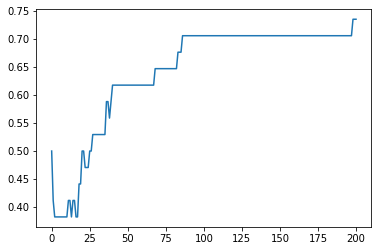

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = torch_geometric.nn.GCNConv(dataset.num_features, 3)
        self.out = torch_geometric.nn.Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
        h_ = self.gcn(x, edge_index)
        
        #https://pytorch.org/docs/stable/nn.functional.html
        h = torch.nn.functional.relu(h_)
        
        
        
        z = self.out(h)
        return h, z
    
model11 = GCN()
print(summary(model11, graphs.x, graphs.edge_index))
print(model11)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model11.parameters(), lr=0.02)

# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# Data for animations
embeddings = []
losses = []
accuracy_list = []
outputs = []

# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, z = model11(graphs.x, graphs.edge_index)

    # Calculate loss function
    loss = criterion(z[nn_mask], graphs.y[nn_mask])

    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), graphs.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracy_list.append(acc)
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%| {accuracy_list[-1]}, {int(accuracy_list[-1]*graphs.x.size()[0])} correct, {int(graphs.x.size()[0]-int(accuracy_list[-1]*graphs.x.size()[0]))} wrong')
plt.plot(accuracy_list)
print(f'{accuracy_list[-1]}, {int(accuracy_list[-1]*graphs.x.size()[0])} correct, {int(graphs.x.size()[0]-int(accuracy_list[-1]*graphs.x.size()[0]))} wrong ')

#Deepwalk

Here is a quick description of deepwalk:
* let's say for example, our graph has 34 nodes and 34 features, the deepwalk will not use the y vector, but it's going to take the adjacency matrix and parts of the graph, in order to generate an x-y dimension.
* Nodes that are very close in the graph, will end up close to eachother, after the implementation of deepwalk

First, we get certain properties and generate random sequences of a graph 

This part is to convert the adjency 

In [ ]:
def convertAdjtoList(A_adj):
    A_adjList=[]
    # A_adj is expected to be in an adjaceny matrix form, can be generated from
    # Pygeometric utils ; torch_geometric.utils.to_dense_adj(graphs.edge_index)[0].numpy().astype(int):
    for row in A_adj:
        neighbors_args=np.argwhere(row==np.max(row)).reshape(1,-1)[0]
        print (neighbors_args, len(neighbors_args))
        #if len(neighbors_args)<=1:
        #    continue
        #else:
            #A_adjList.append(list(neighbors_args))
        A_adjList.append(list(neighbors_args))
    return A_adjList

    
w=3            # window size
d=2            # embedding size
y=200          # walks per vertex
t=6            # walk length 
lr=0.025       # learning rate
v=[0,1,2,3,4,5,6,7] # labels of available vertices
adj_list = [[1,2,3], [0,2,3], [0, 1, 3], [0, 1, 2], [5, 6], [4,6], [4, 5], [1, 3]]
size_vertex = len(adj_list)  # number of vertices

A_adj=torch_geometric.utils.to_dense_adj(graphs.edge_index)[0].numpy().astype(int)
A_adjList=convertAdjtoList(A_adj)
graphs.edge_index, A_adjList

#We got this code from https://dsgiitr.com/blogs/deepwalk/
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.phi  = torch.nn.Parameter(torch.rand((size_vertex, d), requires_grad=True))    
        self.phi2 = torch.nn.Parameter(torch.rand((d, size_vertex), requires_grad=True))
        
        
    def forward(self, one_hot):
        hidden = torch.matmul(one_hot, self.phi)
        out    = torch.matmul(hidden, self.phi2)
        return out


def skip_gram(wvi,  w):
    for j in range(len(wvi)):
        for k in range(max(0,j-w) , min(j+w, len(wvi))):
            
            #generate one hot vector
            one_hot          = torch.zeros(size_vertex)
            one_hot[wvi[j]]  = 1
            
            out              = model(one_hot)
            loss             = torch.log(torch.sum(torch.exp(out))) - out[wvi[k]]
            loss.backward()
            
            for param in model.parameters():
                param.data.sub_(lr*param.grad)
                param.grad.data.zero_()
def RandomWalk(node,t):
    walk = [node]        # Walk starts from this node
    
    for i in range(t-1):
        node = adj_list[node][random.randint(0,len(adj_list[node])-1)]
        walk.append(node)

    return walk

In [ ]:
%%time
# https://towardsdatascience.com/introduction-to-graph-neural-networks-with-deepwalk-f5ac25900772
dw = DeepWalk(dimensions=2, walk_length=34*2 , walk_number=34)
dw.fit(graphs_x)
graph_embedding= dw.get_embedding()

CPU times: user 379 ms, sys: 9.9 ms, total: 389 ms
Wall time: 382 ms


In [ ]:
%%time
w=5            # window size
d=2            # embedding size
y=200          # walks per vertex
t=34            # walk length 
lr=0.01       # learning rate
model = Model()

for i in range(y):
    np.random.shuffle(v)
    for vi in v:
        #print (i,v)
        wvi=RandomWalk(vi,t)
        skip_gram(wvi, w)



CPU times: user 2min 16s, sys: 343 ms, total: 2min 16s
Wall time: 2min 25s


In [ ]:
%%time
A_adj=torch_geometric.utils.to_dense_adj(graphs.edge_index)[0].numpy().astype(int)
A_adjList=convertAdjtoList(A_adj)
adj_list=A_adjList

v=list(range(V)) # labels of available vertices
#adj_list = [[1,2,3], [0,2,3], [0, 1, 3], [0, 1, 2], [5, 6], [4,6], [4, 5], [1, 3]]
size_vertex = V  # number of vertices

model = Model()
graph_embedding=model.phi.detach().numpy()

[ 1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31] 16
[ 0  2  3  7 13 17 19 21 30] 9
[ 0  1  3  7  8  9 13 27 28 32] 10
[ 0  1  2  7 12 13] 6
[ 0  6 10] 3
[ 0  6 10 16] 4
[ 0  4  5 16] 4
[0 1 2 3] 4
[ 0  2 30 32 33] 5
[ 2 33] 2
[0 4 5] 3
[0] 1
[0 3] 2
[ 0  1  2  3 33] 5
[32 33] 2
[32 33] 2
[5 6] 2
[0 1] 2
[32 33] 2
[ 0  1 33] 3
[32 33] 2
[0 1] 2
[32 33] 2
[25 27 29 32 33] 5
[25 27 31] 3
[23 24 31] 3
[29 33] 2
[ 2 23 24 33] 4
[ 2 31 33] 3
[23 26 32 33] 4
[ 1  8 32 33] 4
[ 0 24 25 28 32 33] 6
[ 2  8 14 15 18 20 22 23 29 30 31 33] 12
[ 8  9 13 14 15 18 19 20 22 23 26 27 28 29 30 31 32] 17
CPU times: user 49.5 ms, sys: 5.22 ms, total: 54.7 ms
Wall time: 51.2 ms


In [ ]:
RandomWalk(7,5)

[7, 1, 21, 1, 7]

In [ ]:
graph_embedding

In [ ]:
#print(model.phi)
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
colors = ["#386cb0", "#fdb462", "#7fc97f" ,"#b4aea9"]
colors_dict={0:"#386cb0",1:"#fdb462",2:"#7fc97f",3:"#b4aea9"}

This will generate the graph

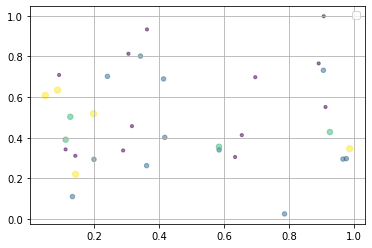

In [ ]:
plt.scatter(x=graph_embedding[:,0], y=graph_embedding[:,1]
            , s=(graphs.y+1) * 10
            #, label=list(graphs.y.numpy())
            #, marker=graphs.y
            , c=graphs.y
            , cmap='viridis'
            , alpha=0.5)
plt.legend()
plt.grid(True)

plt.show()


We can observe that, for the most part, the colors are somewhat close to each other. They are not idealy separated.

In [ ]:
y_class_0_mask=(graphs.y==0).numpy()
y_class_1_mask=(graphs.y==1).numpy()
y_class_2_mask=(graphs.y==2).numpy()
y_class_3_mask=(graphs.y==3).numpy()

y_pred_class_0_mask=(z.argmax(dim=1)==0).numpy()
y_pred_class_1_mask=(z.argmax(dim=1)==1).numpy()
y_pred_class_2_mask=(z.argmax(dim=1)==2).numpy()
y_pred_class_3_mask=(z.argmax(dim=1)==3).numpy()


Here, we crate a scatter plot of the previous graph.

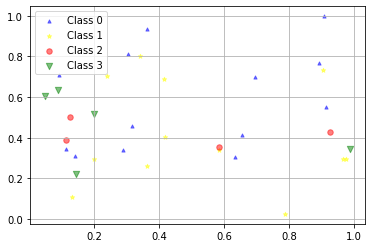

In [ ]:
plt.scatter(
            x=graph_embedding[:,0][y_class_0_mask]
            , y=graph_embedding[:,1][y_class_0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker="^"
            #, c=graphs.y[y_class_0_mask]
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=graph_embedding[:,0][y_class_1_mask]
            , y=graph_embedding[:,1][y_class_1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="*"
            #, c=graphs.y[y_class_1_mask]
            , color='yellow'
            , alpha=0.5)

plt.scatter(
            x=graph_embedding[:,0][y_class_2_mask]
            , y=graph_embedding[:,1][y_class_2_mask]
            , s=(2+1) * 10
            , label="Class 2"
            , marker="o"
            #, c=graphs.y[y_class_2_mask]
            , color='red'
            , alpha=0.5)

plt.scatter(
            x=graph_embedding[:,0][y_class_3_mask]
            , y=graph_embedding[:,1][y_class_3_mask]
            , s=(3+1) * 10
            , label="Class 3"
            , marker='v'
            #, c=graphs.y[y_class_3_mask]
            , color='green'
            , alpha=0.5)

plt.legend()
plt.grid(True)

plt.show()


Here, we are doing the same process as we have been doing in the previous slide. However, in this case, we will use all the nodes but we will not train them.

tensor(0.1176)
+---------------------+--------------------+----------------+----------+
| Layer               | Input Shape        | Output Shape   | #Param   |
|---------------------+--------------------+----------------+----------|
| Sequential_7b547d   | [34, 34], [2, 156] | [34, 2]        | 170      |
| ├─(module_0)GCNConv | [34, 34], [2, 156] | [34, 4]        | 140      |
| ├─(module_1)Tanh    | [34, 4]            | [34, 4]        | --       |
| ├─(module_2)GCNConv | [34, 4], [2, 156]  | [34, 4]        | 20       |
| ├─(module_3)Tanh    | [34, 4]            | [34, 4]        | --       |
| ├─(module_4)GCNConv | [34, 4], [2, 156]  | [34, 2]        | 10       |
| ├─(module_5)Tanh    | [34, 2]            | [34, 2]        | --       |
+---------------------+--------------------+----------------+----------+
Sequential(
  (0): GCNConv(34, 4)
  (1): Tanh()
  (2): GCNConv(4, 4)
  (3): Tanh()
  (4): GCNConv(4, 2)
  (5): Tanh()
)
CPU times: user 36.1 ms, sys: 1.01 ms, total: 37.1 ms
Wall tim

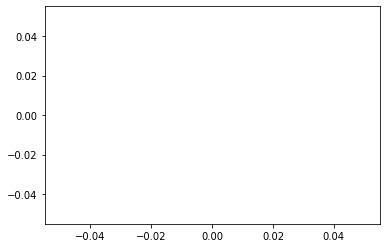

In [ ]:
%%time
# Selected arrbitrarily in the paper, usually picked to be equal to the number of the of features i/p , i.e. 34 , but we picked 4 for simplicity
# No. of output classes, in the paper it is 4 since we have 4 possible
H=4
F=2

#nn_mask=np.ones([V]).astype(bool) ######### Supervised
nn_mask=graphs.train_mask ### Semi-supervised

# Training Rate is the ratio between Training nodes used in NN and the total number of nodes in the graph
tr_rate=nn_mask.sum()/graphs.y.size()[0] 
print (tr_rate)

model2_gcn= torch_geometric.nn.Sequential(\
                                       'X, A_coo'\
                                       , [
                                        (torch_geometric.nn.GCNConv(X.shape[1], H), 'X, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch_geometric.nn.GCNConv(H, H), 'H, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch_geometric.nn.GCNConv(H, F), 'H, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        #,(torch.nn.LogSoftmax(dim=1),'H -> H')

                                        ]\
                                      )

print(summary(model2_gcn, graphs.x, graphs.edge_index))
print(model2_gcn)

alpha=0.01

# https://stackoverflow.com/questions/52946920/bool-value-of-tensor-with-more-than-one-value-is-ambiguous-in-pytorch
# Loss function must be instantiate before being used
loss_function=torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model2_gcn.parameters(), lr=alpha)

#Training Using the whole node set
accuracy_list=[]
Z_list=[]
L_list=[]
y_predicted_list=[]
y_error_mask_list=[]

Z=model2_gcn(graphs.x,graphs.edge_index)
Z_list.append(Z)

for epochs in range (-1+1):
    #https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
    # for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. This accumulating behaviour is convenient while training RNNs or when we want to compute the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call
    # when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters, and the newly-computed gradient.
    #optimizer.zero_grad() clears x.grad for every parameter x in the optimizer. It’s important to call this before loss.backward(), otherwise you’ll accumulate the gradients from multiple passes.
    optimizer.zero_grad()     
    
    #Output is a 1x4 score vector one-hot encoded, the predicted class will be the one with max value
    Z=model2_gcn(graphs.x,graphs.edge_index)
    Z_list.append(Z)
    
    #print (Z[nn_mask].shape, graphs.y[nn_mask].shape)
    
    #L=loss_function( input=Z[nn_mask], target=graphs.y[nn_mask])
    L=loss_function( input=Z[nn_mask], target=Z[nn_mask])
    L_list.append(L)
    
    y_predicted=Z.argmax(dim=1)
    y_predicted_list.append(y_predicted)
    y_error_mask=(y_predicted==graphs.y)
    y_error_mask_list.append(y_error_mask)
    
    accuracy=y_error_mask.sum()/graphs.y.size()[0]
    accuracy_list.append(accuracy)
 
    L.backward()     
    # Tune parameters & Updates Weights
 
    optimizer.step() #updates the value of x using the gradient x.grad
    
plt.plot(accuracy_list)

As we can see in the output cell above, the plot has nothing inside. This is because we have not trained the nodes, which is what we wanted.

Now, in the next cell, we create a scatter plot that separates all the colors and puts them next to each other.

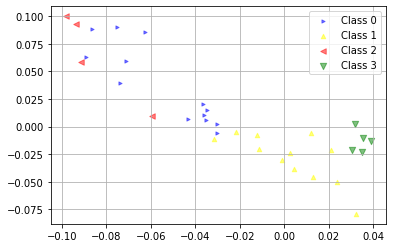

In [ ]:
plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_0_mask]
            , y=Z.detach().numpy()[:,1][y_class_0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker=">"
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_1_mask]
            , y=Z.detach().numpy()[:,1][y_class_1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="^"
            , color='yellow'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_2_mask]
            , y=Z.detach().numpy()[:,1][y_class_2_mask]
            , s=(2+1) * 10
            , label="Class 2"
            , marker="<"
            , color='red'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_3_mask]
            , y=Z.detach().numpy()[:,1][y_class_3_mask]
            , s=(3+1) * 10
            , label="Class 3"
            , marker='v'
            , color='green'
            , alpha=0.5)

plt.legend()
plt.grid(True)

plt.show()


In [ ]:
#https://docs.dgl.ai/en/0.9.x/generated/dgl.data.KarateClubDataset.html
dataset = dgl.data.KarateClubDataset()
num_classes = dataset.num_classes
g = dataset[0]
labels = g.ndata['label']
labels

NameError: ignored

In [ ]:
labels_class0_mask=(labels==0)
labels_class1_mask=(labels==1)

In [ ]:
%%time
# Selected arrbitrarily in the paper, usually picked to be equal to the number of
# of the of features i/p , i.e. 34 , but we picked 4 for simplicity
H=4

# No. of output classes, in the paper it is 4 since we have 4 possible
# classes per node

F=2

#nn_mask=np.ones([V]).astype(bool)
#nn_mask=graphs.train_mask
nn_mask=np.concatenate(([1], np.zeros(32), [1])).astype(bool)


# Training Rate is the ratio between Training nodes used in NN and the total number of nodes in the graph

tr_rate=nn_mask.sum()/graphs.y.size()[0] 
print (tr_rate)


model2_gcn= torch_geometric.nn.Sequential(\
                                       'X, A_coo'\
                                       , [
                                        (torch_geometric.nn.GCNConv(X.shape[1], H), 'X, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch_geometric.nn.GCNConv(H, H), 'H, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch_geometric.nn.GCNConv(H, F), 'H, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        #,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch.nn.Softmax(dim=1),'H -> H')
                                        #,torch.nn.Linear(F, H)
                                        ]\
                                      )
                                        

print(summary(model2_gcn, graphs.x, graphs.edge_index))
print(model2_gcn)


alpha=0.01

#loss_function=torch.nn.CrossEntropyLoss()
loss_function=torch.nn.CrossEntropyLoss()
#loss_function=torch.nn.NLLLoss()
#loss_function=torch.nn.L1Loss(reduction='mean')
#loss_function=torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model2_gcn.parameters(), lr=alpha)


###### Training Using the whole node set
accuracy_list=[]
Z_list=[]
L_list=[]
y_predicted_list=[]
y_error_mask_list=[]


for epochs in range (300+1):
    optimizer.zero_grad()     
    
    Z=model2_gcn(graphs.x,graphs.edge_index)
    Z_list.append(Z)
    
    
    L=loss_function( input=Z[nn_mask], target=labels[nn_mask])
    L_list.append(L)
    
    y_predicted=Z.argmax(dim=1)
    y_predicted_list.append(y_predicted)
    y_error_mask=(y_predicted==labels)
    y_error_mask_list.append(y_error_mask)
    

    
    
    accuracy=y_error_mask.sum()/labels.size()[0]
    accuracy_list.append(accuracy)
    
    
    # Compute gradients

    L.backward()     

    # Tune parameters
    # Updates Weights
    optimizer.step()
    
plt.plot(accuracy_list)
print(accuracy_list[-1])

In [ ]:
plt.scatter(
            x=Z.detach().numpy()[:,0][labels_class0_mask]
            , y=Z.detach().numpy()[:,1][labels_class0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker=">"
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][labels_class1_mask]
            , y=Z.detach().numpy()[:,1][labels_class1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="^"
            , color='yellow'
            , alpha=0.5)


plt.legend()
plt.grid(True)

plt.show()


In [ ]:

# Selected arrbitrarily in the paper, usually picked to be equal to the number of
# of the of features i/p , i.e. 34 , but we picked 4 for simplicity
H=4

# No. of output classes, in the paper it is 4 since we have 4 possible
# classes per node

F=4

#nn_mask=np.ones([V]).astype(bool)
#nn_mask=graphs.train_mask
nn_mask=graphs.train_mask


# Training Rate is the ratio between Training nodes used in NN and the total number of nodes in the graph

tr_rate=nn_mask.sum()/graphs.y.size()[0] 
print (tr_rate)


model2_gcn= torch_geometric.nn.Sequential(\
                                       'X, A_coo'\
                                       , [
                                        (torch_geometric.nn.GCNConv(X.shape[1], H), 'X, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch_geometric.nn.GCNConv(H, H), 'H, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch_geometric.nn.GCNConv(H, F), 'H, A_coo -> H')\
                                        ,(torch.nn.Tanh(), 'H -> H')
                                        #,(torch.nn.Tanh(), 'H -> H')
                                        ,(torch.nn.Softmax(dim=1),'H -> H')
                                        #,torch.nn.Linear(F, H)
                                        ]\
                                      )
                                        

print(summary(model2_gcn, graphs.x, graphs.edge_index))
print(model2_gcn)


alpha=0.01

#loss_function=torch.nn.CrossEntropyLoss()
loss_function=torch.nn.CrossEntropyLoss()
#loss_function=torch.nn.NLLLoss()
#loss_function=torch.nn.L1Loss(reduction='mean')
#loss_function=torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model2_gcn.parameters(), lr=alpha)


###### Training Using the whole node set
accuracy_list=[]
Z_list=[]
L_list=[]
y_predicted_list=[]
y_error_mask_list=[]


for epochs in range (300+1):
    optimizer.zero_grad()     
    
    Z=model2_gcn(graphs.x,graphs.edge_index)
    Z_list.append(Z)
    
    
    L=loss_function( input=Z[nn_mask], target=graphs.y[nn_mask])
    L_list.append(L)
    
    y_predicted=Z.argmax(dim=1)
    y_predicted_list.append(y_predicted)
    y_error_mask=(y_predicted==graphs.y)
    y_error_mask_list.append(y_error_mask)
    

    
    
    accuracy=y_error_mask.sum()/labels.size()[0]
    accuracy_list.append(accuracy)
    
    
    # Compute gradients

    L.backward()     

    # Tune parameters
    # Updates Weights
    optimizer.step()
    
plt.plot(accuracy_list)
print(accuracy_list[-1])

In [ ]:
plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_0_mask]
            , y=Z.detach().numpy()[:,1][y_class_0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker=">"
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_1_mask]
            , y=Z.detach().numpy()[:,1][y_class_1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="^"
            , color='yellow'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_2_mask]
            , y=Z.detach().numpy()[:,1][y_class_2_mask]
            , s=(2+1) * 10
            , label="Class 2"
            , marker="<"
            , color='red'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_3_mask]
            , y=Z.detach().numpy()[:,1][y_class_3_mask]
            , s=(3+1) * 10
            , label="Class 3"
            , marker='v'
            , color='green'
            , alpha=0.5)

plt.legend()
plt.grid(True)

plt.show()


In [ ]:
plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_0_mask]
            , y=Z.detach().numpy()[:,1][y_class_0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker=">"
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_1_mask]
            , y=Z.detach().numpy()[:,1][y_class_1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="^"
            , color='yellow'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_2_mask]
            , y=Z.detach().numpy()[:,1][y_class_2_mask]
            , s=(2+1) * 10
            , label="Class 2"
            , marker="<"
            , color='red'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_3_mask]
            , y=Z.detach().numpy()[:,1][y_class_3_mask]
            , s=(3+1) * 10
            , label="Class 3"
            , marker='v'
            , color='green'
            , alpha=0.5)

plt.legend()
plt.grid(True)

plt.show()


In [ ]:
plt.scatter(
            x=Z.detach().numpy()[:,1][y_class_0_mask]
            , y=Z.detach().numpy()[:,2][y_class_0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker=">"
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,1][y_class_1_mask]
            , y=Z.detach().numpy()[:,2][y_class_1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="^"
            , color='yellow'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,1][y_class_2_mask]
            , y=Z.detach().numpy()[:,2][y_class_2_mask]
            , s=(2+1) * 10
            , label="Class 2"
            , marker="<"
            , color='red'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,1][y_class_3_mask]
            , y=Z.detach().numpy()[:,2][y_class_3_mask]
            , s=(3+1) * 10
            , label="Class 3"
            , marker='v'
            , color='green'
            , alpha=0.5)

plt.legend()
plt.grid(True)

plt.show()


In [ ]:

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = Z.detach().numpy()[:,0][y_class_0_mask]
y1 = Z.detach().numpy()[:,1][y_class_0_mask]
z1 = Z.detach().numpy()[:,2][y_class_0_mask]

x2 = Z.detach().numpy()[:,0][y_class_1_mask]
y2 = Z.detach().numpy()[:,1][y_class_1_mask]
z2 = Z.detach().numpy()[:,2][y_class_1_mask]

x3 = Z.detach().numpy()[:,0][y_class_2_mask]
y3 = Z.detach().numpy()[:,1][y_class_2_mask]
z3 = Z.detach().numpy()[:,2][y_class_2_mask]

x4 = Z.detach().numpy()[:,0][y_class_3_mask]
y4 = Z.detach().numpy()[:,1][y_class_3_mask]
z4 = Z.detach().numpy()[:,2][y_class_3_mask]


ax.set_xlabel("X1-Embedding")
ax.set_ylabel("X2-Embedding")
ax.set_zlabel("X3-Embedding")

ax.scatter(x1, y1, z1, label='Class0')
ax.scatter(x2, y2, z2, label='Class1')
ax.scatter(x3, y3, z3, label='Class2')
ax.scatter(x4, y4, z4, label='Class3')

plt.show()
plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_0_mask]
            , y=Z.detach().numpy()[:,1][y_class_0_mask]
            , s=(0+1) * 10
            , label="Class 0"
            , marker=">"
            , color='blue'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_1_mask]
            , y=Z.detach().numpy()[:,1][y_class_1_mask]
            , s=(1+1) * 10
            , label="Class 1"
            , marker="^"
            , color='yellow'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_2_mask]
            , y=Z.detach().numpy()[:,1][y_class_2_mask]
            , s=(2+1) * 10
            , label="Class 2"
            , marker="<"
            , color='red'
            , alpha=0.5)

plt.scatter(
            x=Z.detach().numpy()[:,0][y_class_3_mask]
            , y=Z.detach().numpy()[:,1][y_class_3_mask]
            , s=(3+1) * 10
            , label="Class 3"
            , marker='v'
            , color='green'
            , alpha=0.5)

plt.legend()
plt.grid(True)

plt.show()


In [ ]:

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = Z.detach().numpy()[:,1][y_class_0_mask]
y1 = Z.detach().numpy()[:,2][y_class_0_mask]
z1 = Z.detach().numpy()[:,3][y_class_0_mask]

x2 = Z.detach().numpy()[:,1][y_class_1_mask]
y2 = Z.detach().numpy()[:,2][y_class_1_mask]
z2 = Z.detach().numpy()[:,3][y_class_1_mask]

x3 = Z.detach().numpy()[:,1][y_class_2_mask]
y3 = Z.detach().numpy()[:,2][y_class_2_mask]
z3 = Z.detach().numpy()[:,3][y_class_2_mask]

x4 = Z.detach().numpy()[:,1][y_class_3_mask]
y4 = Z.detach().numpy()[:,2][y_class_3_mask]
z4 = Z.detach().numpy()[:,3][y_class_3_mask]


ax.set_xlabel("X1-Embedding")
ax.set_ylabel("X2-Embedding")
ax.set_zlabel("X3-Embedding")

ax.scatter(x1, y1, z1, label='Class0')
ax.scatter(x2, y2, z2, label='Class1')
ax.scatter(x3, y3, z3, label='Class2')
ax.scatter(x4, y4, z4, label='Class3')

plt.show()


In [ ]:

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = Z.detach().numpy()[:,2][y_class_0_mask]
y1 = Z.detach().numpy()[:,3][y_class_0_mask]
z1 = Z.detach().numpy()[:,0][y_class_0_mask]

x2 = Z.detach().numpy()[:,2][y_class_1_mask]
y2 = Z.detach().numpy()[:,3][y_class_1_mask]
z2 = Z.detach().numpy()[:,0][y_class_1_mask]

x3 = Z.detach().numpy()[:,2][y_class_2_mask]
y3 = Z.detach().numpy()[:,3][y_class_2_mask]
z3 = Z.detach().numpy()[:,0][y_class_2_mask]

x4 = Z.detach().numpy()[:,2][y_class_3_mask]
y4 = Z.detach().numpy()[:,3][y_class_3_mask]
z4 = Z.detach().numpy()[:,0][y_class_3_mask]


ax.set_xlabel("X1-Embedding")
ax.set_ylabel("X2-Embedding")
ax.set_zlabel("X3-Embedding")

ax.scatter(x1, y1, z1, label='Class0')
ax.scatter(x2, y2, z2, label='Class1')
ax.scatter(x3, y3, z3, label='Class2')
ax.scatter(x4, y4, z4, label='Class3')

plt.show()


In [ ]:

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x1 = Z.detach().numpy()[:,3][y_class_0_mask]
y1 = Z.detach().numpy()[:,0][y_class_0_mask]
z1 = Z.detach().numpy()[:,1][y_class_0_mask]

x2 = Z.detach().numpy()[:,3][y_class_1_mask]
y2 = Z.detach().numpy()[:,0][y_class_1_mask]
z2 = Z.detach().numpy()[:,1][y_class_1_mask]

x3 = Z.detach().numpy()[:,3][y_class_2_mask]
y3 = Z.detach().numpy()[:,0][y_class_2_mask]
z3 = Z.detach().numpy()[:,1][y_class_2_mask]

x4 = Z.detach().numpy()[:,3][y_class_3_mask]
y4 = Z.detach().numpy()[:,0][y_class_3_mask]
z4 = Z.detach().numpy()[:,1][y_class_3_mask]


ax.set_xlabel("X1-Embedding")
ax.set_ylabel("X2-Embedding")
ax.set_zlabel("X3-Embedding")

ax.scatter(x1, y1, z1, label='Class0')
ax.scatter(x2, y2, z2, label='Class1')
ax.scatter(x3, y3, z3, label='Class2')
ax.scatter(x4, y4, z4, label='Class3')

plt.show()


In [ ]:
##################### Accessing Model Internal Parameters in Sequential Models
for entry in model2_gcn.state_dict():
    print (entry)

In [ ]:
model2_gcn.state_dict().keys()

In [ ]:
print (model2_gcn.state_dict()['module_0.bias'])

In [ ]:
for layer in model2_gcn:
    print (layer)

In [ ]:
model2_gcn[0]

In [ ]:
#for layer in (model2_gcn):
#    Z1=layer(graphs.x, graphs.edge_index)


In [ ]:
list(model2_gcn.parameters())

#References

1.  https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/summary.html#summary
2. https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/summary.html#summary
3. https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html#torch.nn.LogSoftmax
4.  https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html
5. https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/datasets/karate.html
6. https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub
7. Zachary's karate club network from the "An Information Flow Model for Conflict and Fission in Small Groups" paper, containing 34 nodes, connected by 156 (undirected and unweighted) edges.
8. https://www.jstor.org/stable/3629752 : An Information Flow Model for Conflict and Fission in Small Groups - Wayne W. Zachary
9. https://mlabonne.github.io/blog/intrognn/
10.  https://mlabonne.github.io/blog/intrognn/
11. A Comprehensive Survey on Graph Neural Networks | IEEE Journals ... https://ieeexplore.ieee.org/abstract/document/9046288/. 
12. “Graph and Its Representations.” GeeksforGeeks, 23 Nov. 2022, https://www.geeksforgeeks.org/graph-and-its-representations/. 
Editorial. 
13. “Deep Learning vs. Traditional Image Processing - a Comparison.” RoboticsBiz, 6 Sept. 2022, https://roboticsbiz.com/deep-learning-vs-traditional-image-processing-a-comparison/#:~:text=DL%20helps%20achieve%20greater%20accuracy,machines%20can%20now%20outperform%20humans. 
14. “What Is Medical Image Processing.” Synopsys, https://www.synopsys.com/glossary/what-is-medical-image-processing.html#:~:text=Medical%20image%20processing%20encompasses%20the,planning%2C%20or%20for%20research%20purposes. 
Embl-Ebi. 
15. “Closeness Centrality.” Closeness Centrality | Network Analysis of Protein Interaction Data, https://www.ebi.ac.uk/training/online/courses/network-analysis-of-protein-interaction-data-an-introduction/building-and-analysing-ppins/topological-ppin-analysis/closeness-centrality/. 
Hong, Shanon. 
16. “An Introduction to Graph Neural Network(Gnn) for Analysing Structured Data.” Medium, Towards Data Science, 28 June 2021, https://towardsdatascience.com/an-introduction-to-graph-neural-network-gnn-for-analysing-structured-data-afce79f4cfdc. 
Mwiti, Derrick. 
17. “The Essential Guide to GNN (Graph Neural Networks).” Cnvrg, 14 Apr. 2021, https://cnvrg.io/graph-neural-networks/. 
Sharma, Nikita. 
18. “Introduction to Graph Neural Networks.” Medium, Heartbeat, 24 Sept. 2021, https://heartbeat.comet.ml/introduction-to-graph-neural-networks-c5a9f4aa9e99. 
19. “Karate Club#.” Karate Club - NetworkX 2.8.8 Documentation, https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html. 
Menzli, Amal. 
20. “Graph Neural Network and Some of GNN Applications: Everything You Need to Know.” Neptune.ai, 7 Dec. 2022, https://neptune.ai/blog/graph-neural-network-and-some-of-gnn-applications. 